In [24]:
import subprocess
import numpy as np

# Protoype Definitions:
1. LWR

## 1. LWR

In [69]:
lwr = {'name' : 'LWR',
       'lifetime' : 720,
       'config' : {'Reactor' : {'fuel_incommods' :  {'val' : ['commod',]},
                                'fuel_inrecipes' :  {'val' : ['commod_recipe',]},
                                'fuel_outcommods' : {'val' : ['commod',]},
                                'fuel_outrecipes' : {'val' : ['commod_recipe',]},
                                'cycle_time' : 1,
                                'refuel_time' : 0,
                                'assem_size' : 1,
                                'n_assem_core' : 1,
                                'n_assem_batch' : 1,
                                'power_cap' : 1000
                               }
                  }
      }

# Regions and Institutions:
1. Deploy Inst (Init Fleet)
2. Manager Inst (Remainder of FC facilities)
3. Growth Region

## 1. Init LWR Fleet (Deploy Inst)

In [60]:
n_inits = 100
init_lwr_prototypes = ['LWR' for x in range(0, n_inits)]
n_builds = [1 for x in range(0, n_inits)]
build_times = [x + 1 for x in range(0, 17) for y in range(0,6)]
del build_times[-3:-1]
lifetimes = [181, 186, 191, 196, 
             201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296,
             301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396,
             401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 481, 486, 491, 496,
             501, 506, 511, 516, 521, 526, 531, 536, 541, 546, 551, 556, 561, 566, 571, 576, 581, 586, 591, 596,
             601, 606, 611, 616, 621, 626, 631, 636, 641, 646, 651, 656, 661, 666, 671, 676
            ]

assert len(init_lwr_prototypes) == n_inits
assert len(n_builds) == n_inits
assert len(build_times) == n_inits
assert len(lifetimes) == n_inits

In [70]:
init_fleet = {'name' : 'InitFleet', 
              'config' : {'DeployInst' : {'prototypes' :  {'val' : init_lwr_prototypes},
                                          'n_build' :     {'val' : n_builds},
                                          'build_times' : {'val' : build_times},
                                          'lifetimes' :   {'val' : lifetimes}
                                         }
                         }
             }

## 2. FC Inst (Manager Inst)

In [71]:
fc_prototypes = ['Source', 'LWR', 'Sink']

fc_inst = {'name': 'FCInst', 
           'initialfacilitylist' : {'entry': [{'number': 1, 'prototype': 'Source'},
                                              {'number': 1, 'prototype': 'Sink'}]
                                   },
           'config' : {'ManagerInst': {'prototypes' : {'val' : fc_prototypes}
                                      }
                      }
          }

## 3. Growth Region

In [57]:
lin_func = {'piece' : [{'start' : 18,
                        'function' : {'type' : 'linear',
                                      'params' : '0 100000'
                                     }
                       }]
           }

growth_region = {'GrowthRegion' : {'growth' : {'item' : [{'commod' : 'power',
                                                          'piecewise_function' : lin_func
                                                         }]
                                              }
                                  }
                }

# Recipes
1. Depleted U
2. Natural U
3. NonAdditive U Isotopes (U234)
4. Additive U Isotopes (U232, U233, U234)
5. Almost UOX NonAdditive Enr Ratio
6. Almost UOX Additive Enr Ratio
7. UOX without Additive
8. UOX with Additive
9. Spent UOX from #7
10. Spent UOX from #8

In [ ]:
#1
dep_u = {'name': 'DepU',
         'basis': 'mass',
         'nuclide': [{'id': 'U235', 'comp': 0.0025}, 
                     {'id': 'U238', 'comp': 0.9975}]
        }
#2
nat_u = {'name': 'NatU',
         'basis': 'mass',
         'nuclide': [{'id': 'U235', 'comp': 0.007110}, 
                     {'id': 'U238', 'comp': 0.992890}]
        }
#3
non_isos = {'name': 'NonAdditive_234',
            'basis': 'mass',
            'nuclide': [{'id': 'U234', 'comp': 1.0},]
           }
#4
add_isos = {'name': 'Additive_232_233_234',
            'basis': 'mass',
            'nuclide': [{'id': 'U232', 'comp': 1.0},
                        {'id': 'U233', 'comp': 1.0},
                        {'id': 'U234', 'comp': 1.0}]
           }

# Main Input File

In [75]:
control = {'duration': '12', 
           'startmonth': '1', 
           'startyear': '2020',
           'dt': 86400}

archetypes = {'spec': [{'lib': 'cycamore', 'name': 'Source'},
                       {'lib': 'cycamore', 'name': 'Enrichment'},
                       {'lib': 'cycamore', 'name': 'Mixer'},
                       {'lib': 'cycamore', 'name': 'Reactor'},
                       {'lib': 'cycamore', 'name': 'Storage'},
                       {'lib': 'cycamore', 'name': 'Sink'},
                       {'lib': 'cycamore', 'name': 'DeployInst'},
                       {'lib': 'cycamore', 'name': 'ManagerInst'},
                       {'lib': 'cycamore', 'name': 'GrowthRegion'},
                      ]
             }

region = {'name' : 'GrowthRegion', 
          'config' : growth_region, 
          'institution' : [init_fleet, fc_inst]
         }

source = {'name': 'Source', 
          'config': {'Source': {'outcommod': 'commod',
                                'outrecipe': 'commod_recipe',
                                'throughput': '1'
                               }
                    }
         }

sink = {'name': 'Sink', 
        'config': {'Sink': {'in_commods': {'val': 'commod'}, 
                            'capacity': '12', 
                            'recipe_name': 'commod_recipe'
                           }
                  }
       }

In [73]:
test_sim = {'simulation' : {'control' : control,
                            'archetypes' : archetypes,
                            'region' : region,
                            'facility' : [source, lwr, sink],
                            'recipe' : [commod_recipe,]
                           }
           }

with open('test_py.py', 'w') as outfile: 
    outfile.write('SIMULATION = ' + str(test_sim))
subprocess.run(['rm', 'test_py.sqlite'])
subprocess.run(['cyclus', 'test_py.py', '-o', 'test_py.sqlite'])
#, stdout=subprocess.PIPE)
#subprocess.run(['cyclus', 'test_py.py', '-o', 'test_py.sqlite'], capture_output=True).stdout

CompletedProcess(args=['cyclus', 'test_py.py', '-o', 'test_py.sqlite'], returncode=0)

In [37]:
import cymetric as cym
from cymetric import graphs as cgr

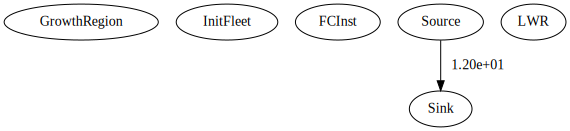

In [74]:
db = cym.dbopen('./test_py.sqlite')
ev = cym.Evaluator(db=db, write=False)
cgr.flow_graph(ev, label='mass')